In [192]:
import pandas as pd
import os
import urllib.request
import numpy as np
from matplotlib import pyplot as plt
from shutil import copyfile
import cv2
from skimage import io



In [107]:
label_df = pd.read_csv("./dataset/class-descriptions-boxable.csv",names=["id","name"])
label_df.head(3)


,id,name
0,/m/011k07,Tortoise
1,/m/011q46kg,Container
2,/m/012074,Magpie


In [196]:
label_id_person = label_df[label_df['name'] == 'Person'].iat[0,0]
label_id_cat = label_df[label_df['name'] == 'Cat'].iat[0,0]
label_id_bird = label_df[label_df['name'] == 'Bird'].iat[0,0]
label_ids = [label_id_person, label_id_cat, label_id_bird]


label_ids

['/m/01g317', '/m/01yrx', '/m/015p6']

In [197]:
image_box_df = pd.read_csv("./dataset/train-annotations-bbox.csv")
image_box_df.head(3)


,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
0,000002b66c9c498e,xclick,/m/01g317,1,0.012500,0.195312,0.148438,0.587500,0,1,0,0,0
1,000002b66c9c498e,xclick,/m/01g317,1,0.025000,0.276563,0.714063,0.948438,0,1,0,0,0
2,000002b66c9c498e,xclick,/m/01g317,1,0.151562,0.310937,0.198437,0.590625,1,0,0,0,0


In [198]:
image_sample = 100
persons = [] 
cats = []
birds = []

for img in image_box_df[image_box_df['LabelName'] == label_id_person]['ImageID'].unique()[:image_sample]:
    persons.append(img + '.jpg')

for img in image_box_df[image_box_df['LabelName'] == label_id_cat]['ImageID'].unique()[:image_sample]:
    cats.append(img + '.jpg')

for img in image_box_df[image_box_df['LabelName'] == label_id_bird]['ImageID'].unique()[:image_sample]:
    birds.append(img + '.jpg')    

In [199]:
img_df = pd.read_csv("./dataset/train-images-boxable.csv")
img_df.head(3)


,image_name,image_url
0,e39871fd9fd74f55.jpg,https://requestor-proxy.figure-eight.com/figur...
1,f18b91585c4d3f3e.jpg,https://requestor-proxy.figure-eight.com/figur...
2,ede6e66b2fb59aab.jpg,https://requestor-proxy.figure-eight.com/figur...


In [200]:
person_df = img_df[img_df['image_name'].isin(persons)]
cat_df = img_df[img_df['image_name'].isin(cats)]
bird_df = img_df[img_df['image_name'].isin(birds)]


person_df.to_csv('./dataset/person_'+str(image_sample)+'.csv')
cat_df.to_csv('./dataset/cat_'+str(image_sample)+'.csv')
bird_df.to_csv('./dataset/bird_'+str(image_sample)+'.csv')

In [8]:
#../coco/images/train2017/
for i in np.arange(len(person_df)):
    name = person_df.iat[i,0]
    url = person_df.iat[i,1]
    # print('name: '+ name)
    # print('url: '+ url)
    print('person ' + str(i))
    urllib.request.urlretrieve(url, './coco/images/person_'+ name)

for i in np.arange(len(cat_df)):
    name = cat_df.iat[i,0]
    url = cat_df.iat[i,1]
    # print('name: '+ name)
    # print('url: '+ url)
    print('cat ' + str(i))
    urllib.request.urlretrieve(url, './coco/images/cat_'+ name)    

for i in np.arange(len(bird_df)):
    name = bird_df.iat[i,0]
    url = bird_df.iat[i,1]
     # print('name: '+ name)
    # print('url: '+ url)
    print('bird ' + str(i))
    urllib.request.urlretrieve(url, './coco/images/bird_'+ name)    

   

person 0
person 1
person 2
person 3
person 4
person 5
person 6
person 7
person 8
person 9
person 10
person 11
person 12
person 13
person 14
person 15
person 16
person 17
person 18
person 19
person 20
person 21
person 22
person 23
person 24
person 25
person 26
person 27
person 28
person 29
person 30
person 31
person 32
person 33
person 34
person 35
person 36
person 37
person 38
person 39
person 40
person 41
person 42
person 43
person 44
person 45
person 46
person 47
person 48
person 49
person 50
person 51
person 52
person 53
person 54
person 55
person 56
person 57
person 58
person 59
person 60
person 61
person 62
person 63
person 64
person 65
person 66
person 67
person 68
person 69
person 70
person 71
person 72
person 73
person 74
person 75
person 76
person 77
person 78
person 79
person 80
person 81
person 82
person 83
person 84
person 85
person 86
person 87
person 88
person 89
person 90
person 91
person 92
person 93
person 94
person 95
person 96
person 97
person 98
person 99
cat 0
cat 

In [2]:
image_box_df = pd.read_csv("./dataset/train-annotations-bbox.csv")

In [201]:
image_box_df.head(3)


,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
0,000002b66c9c498e,xclick,/m/01g317,1,0.012500,0.195312,0.148438,0.587500,0,1,0,0,0
1,000002b66c9c498e,xclick,/m/01g317,1,0.025000,0.276563,0.714063,0.948438,0,1,0,0,0
2,000002b66c9c498e,xclick,/m/01g317,1,0.151562,0.310937,0.198437,0.590625,1,0,0,0,0


In [202]:
person_df = pd.read_csv("./dataset/person_100.csv",index_col=0)
person_df.head(10)


,image_name,image_url
1600149,00005e7429a94ad4.jpg,https://requestor-proxy.figure-eight.com/figur...
1603017,0000aa810854dc2e.jpg,https://requestor-proxy.figure-eight.com/figur...
1603643,0002a06d31985d69.jpg,https://requestor-proxy.figure-eight.com/figur...
1603907,00025431f1dca713.jpg,https://requestor-proxy.figure-eight.com/figur...
1605146,0001e595b536c9ec.jpg,https://requestor-proxy.figure-eight.com/figur...
1607441,000140f27cb00816.jpg,https://requestor-proxy.figure-eight.com/figur...
1607723,000134de87dd044b.jpg,https://requestor-proxy.figure-eight.com/figur...
1609421,00027f4e7a1c370f.jpg,https://requestor-proxy.figure-eight.com/figur...
1609866,00028844acae6fae.jpg,https://requestor-proxy.figure-eight.com/figur...
1609916,0002347a67b7a730.jpg,https://requestor-proxy.figure-eight.com/figur...


In [203]:
bbox_df = image_box_df[(image_box_df['ImageID'] == '0000aa810854dc2e') & (image_box_df['LabelName'] == '/m/01g317')]
bbox_df



,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
1036,0000aa810854dc2e,xclick,/m/01g317,1,0.157500,0.330625,0.289167,0.988333,1,1,0,0,0
1037,0000aa810854dc2e,xclick,/m/01g317,1,0.268125,0.579375,0.356667,0.999167,1,1,0,0,0
1038,0000aa810854dc2e,xclick,/m/01g317,1,0.552500,0.930625,0.224167,0.999167,1,1,0,0,0


In [206]:
#person bbox
for i in np.arange(len(person_df)):
    name = person_df.iat[i,0]

    image_id = name[:16]   
    bbox_df =image_box_df[(image_box_df['ImageID'] == image_id) & (image_box_df['LabelName'] == '/m/01g317')]

    #find bbox and save txt each image
    dasknet_df = pd.DataFrame(columns=['class','x_center','y_center','width','height'])
    for index, row in bbox_df.iterrows():      
        x_min = row['XMin']
        x_max = row['XMax']
        y_min = row['YMin']  
        y_max = row['YMax']
        
        width = x_max - x_min
        height = y_max - y_min
        x_center = x_min + (width / 2)
        y_center = y_min + (height /2)
        dasknet_df = dasknet_df.append({'class':0,'x_center':x_center,'y_center':y_center,'width':width,'height':height},ignore_index = True)

    dasknet_df.to_csv('./coco/labels/person_'+ str(image_id) +'.txt',header=False,index=False)
    print(index)

552
1038
3950
3712
3284
2300
2146
3842
3879
3578
2013
3500
1161
3726
3749
2778
3765
627
2649
97
2657
682
1185
2018
294
4004
1707
2003
557
6
832
1895
1908
1885
3648
2043
2857
3022
884
3358
3965
3924
3858
3770
66
2257
2119
1256
3827
845
3330
182
81
2823
1090
2363
965
190
962
280
1285
917
742
2036
2588
2234
3447
748
1034
2626
2014
860
3983
4127
420
792
1944
3744
3971
3247
265
104
3222
3551
2602
284
1772
1097
1890
3653
4074
1209
3026
3377
310
3833
1955
857
1218
2514


In [207]:
#cat bbox
cat_df = pd.read_csv("./dataset/cat_100.csv",index_col=0)
for i in np.arange(len(cat_df)):
    name = cat_df.iat[i,0]
    image_id = name[:16]   
    bbox_df =image_box_df[(image_box_df['ImageID'] == image_id) & (image_box_df['LabelName'] == '/m/01yrx')]


    #find bbox and save txt each image
    dasknet_df = pd.DataFrame(columns=['class','x_center','y_center','width','height'])
    for index, row in bbox_df.iterrows():      
        x_min = row['XMin']
        x_max = row['XMax']
        y_min = row['YMin']  
        y_max = row['YMax']
        width = x_max - x_min
        height = y_max - y_min
        x_center = x_min + (width / 2)
        y_center = y_min + (height /2)
        dasknet_df = dasknet_df.append({'class':1,'x_center':x_center,'y_center':y_center,'width':width,'height':height},ignore_index = True)

    dasknet_df.to_csv('./coco/labels/cat_'+ str(image_id) +'.txt',header=False,index=False)
    print(index)

58098
63084
28234
70085
46634
63480
48719
80397
67512
75239
7930
23236
63075
66674
32650
34092
15657
70307
46928
72091
55625
77573
55394
66648
45201
79869
39017
44736
9109
67093
28608
56769
66522
74934
75449
61896
1709
78561
78373
69307
29370
37177
45310
79676
15277
80405
51450
23360
73660
62868
36002
64941
74811
44729
62738
38007
39721
21133
50082
66526
61981
46641
37045
27853
66212
40041
50819
57366
37735
11627
75412
67660
73309
52032
41594
61979
47245
47580
35812
78353
79586
35510
38541
29788
23984
74653
40642
55795
74444
54969
56424
44908
75606
22189
56959
66041
80492
13871
76489
72360


In [208]:
#bird bbox
bird_df = pd.read_csv("./dataset/bird_100.csv",index_col=0)
for i in np.arange(len(bird_df)):
    name = bird_df.iat[i,0]
    image_id = name[:16]   
    bbox_df =image_box_df[(image_box_df['ImageID'] == image_id) & (image_box_df['LabelName'] == '/m/015p6')]

    #find bbox and save txt each image
    dasknet_df = pd.DataFrame(columns=['class','x_center','y_center','width','height'])
    for index, row in bbox_df.iterrows():      
        x_min = row['XMin']
        
        x_max = row['XMax']
        y_min = row['YMin']  
        y_max = row['YMax']
        width = x_max - x_min
        height = y_max - y_min
        x_center = x_min + (width / 2)
        y_center = y_min + (height /2)
        dasknet_df = dasknet_df.append({'class':2,'x_center':x_center,'y_center':y_center,'width':width,'height':height},ignore_index = True)

    dasknet_df.to_csv('./coco/labels/bird_'+ str(image_id) +'.txt',header=False,index=False)
    print(index)

2867
50891
36699
38034
50058
52306
46135
9900
30864
38543
40070
55932
11706
42160
20619
50948
46032
23967
46476
9039
39332
30530
36312
56071
36112
45265
29103
26311
39416
9807
11179
35497
56289
5372
27515
23412
29299
30359
52268
47897
15872
8125
14480
42555
43011
49789
44596
56772
55886
46540
50886
44454
24623
4612
52475
25732
45133
49763
46286
6396
38773
55757
52850
34729
49773
42389
45649
34617
39493
24377
41415
56124
33313
33331
56770
35832
18937
27156
52709
9960
40792
55254
50961
33133
57521
51990
46344
16896
42606
46047
38732
33257
34355
50318
25749
29258
41041
32579
44495
37979


width:1024 height:707
x_min:57 y_min:328
x_max:65 y_max:343
width:1024 height:707
x_min:94 y_min:375
x_max:100 y_max:389
width:1024 height:707
x_min:98 y_min:361
x_max:112 y_max:375
width:1024 height:707
x_min:125 y_min:364
x_max:134 y_max:373
width:1024 height:707
x_min:128 y_min:288
x_max:140 y_max:306
width:1024 height:707
x_min:166 y_min:356
x_max:174 y_max:367
width:1024 height:707
x_min:166 y_min:387
x_max:174 y_max:407
width:1024 height:707
x_min:167 y_min:232
x_max:180 y_max:253
width:1024 height:707
x_min:191 y_min:267
x_max:203 y_max:284
width:1024 height:707
x_min:234 y_min:316
x_max:249 y_max:340
width:1024 height:707
x_min:270 y_min:292
x_max:278 y_max:308
width:1024 height:707
x_min:281 y_min:354
x_max:291 y_max:369
width:1024 height:707
x_min:289 y_min:310
x_max:306 y_max:330


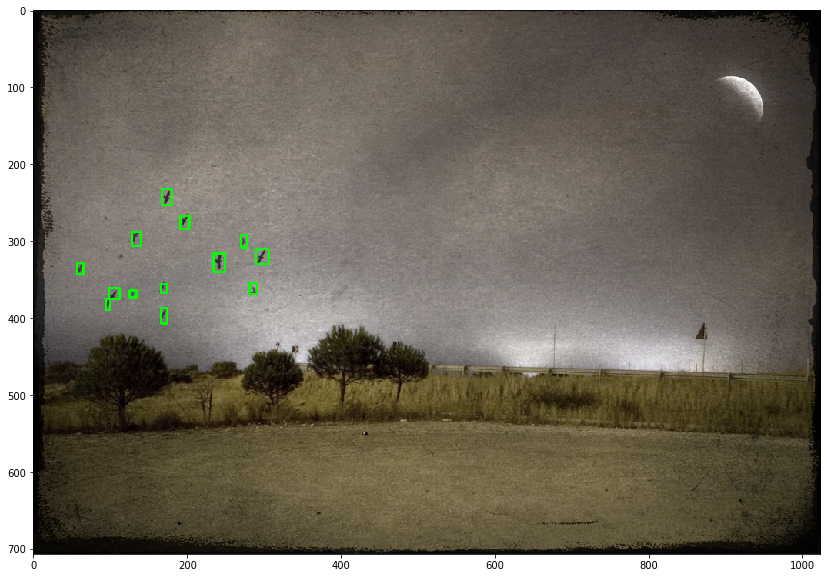

In [211]:
img = io.imread('./coco/images/bird_001cecf004dc4778.jpg')

img_bbox = pd.read_csv('./coco/labels/bird_001cecf004dc4778.txt',names=['class','x_center','y_center','width','height'],header=None)
img_height, img_width, _ = img.shape

img_box = img.copy()
for index, row in img_bbox.iterrows():
    width = row['width'] 
    height = row['height']
    x_center = row['x_center']
    y_center = row['y_center']
    x_min = x_center - (width/2)
    y_min = y_center - (height/2)
    x_max = x_min + width
    y_max = y_min + height


    width = img_width
    height = img_height
    x_center = x_center * width
    y_center = y_center * height
    x_min = int(round( x_min * width))
    y_min =int(round(  y_min * height))
    x_max = int(round( x_max * width))
    y_max = int(round( y_max * height))

    print('width:' + str(width) + ' height:' + str(height) + '\n' 

    'x_min:' + str(x_min) + ' y_min:' + str(y_min) + '\n'
    'x_max:' + str(x_max) + ' y_max:' + str(y_max))

    cv2.rectangle(img_box,(x_min,y_min),(x_max,y_max),(0,255,0),2)

plt.figure(figsize=(15,10))
plt.imshow(img_box)
plt.show()


In [213]:
train_df = pd.DataFrame() 
val_df = pd.DataFrame()

for index,row in person_df.iloc[:70,[0]].iterrows():
    train_df = train_df.append({'image_name': 'coco/images/person_' + row['image_name']},ignore_index=True)
for index,row in person_df.iloc[70:100,[0]].iterrows():
    val_df = val_df.append({'image_name': 'coco/images/person_' + row['image_name']},ignore_index=True)

for index,row in cat_df.iloc[:70,[0]].iterrows():
    train_df = train_df.append({'image_name': 'coco/images/cat_' + row['image_name']},ignore_index=True)
for index,row in cat_df.iloc[70:100,[0]].iterrows():
    val_df = val_df.append({'image_name': 'coco/images/cat_' + row['image_name']},ignore_index=True)

for index,row in bird_df.iloc[:70,[0]].iterrows():

    train_df = train_df.append({'image_name': 'coco/images/cat_' + row['image_name']},ignore_index=True)
for index,row in bird_df.iloc[70:100,[0]].iterrows():
    val_df = val_df.append({'image_name': 'coco/images/cat_' + row['image_name']},ignore_index=True)

print(len(train_df))
print(len(val_df))
 
train_df.to_csv('./coco/train.txt',header=False,index=False)
train_df.to_csv('./coco/val.txt',header=False,index=False)

210
90
